In [26]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy --user
!{sys.executable} -m pip install pandas --user
!{sys.executable} -m pip install scikit-learn --user
!{sys.executable} -m pip install matplotlib --user

NameError: name 'init_notebook_mode' is not defined

load data

In [2]:
import pandas as pd

# making data frame from csv file 
data = pd.read_csv("../data/NACC.csv", index_col ="NACCID" )

#print number of columns
print("Original data set has %d samples and %d variables" %(data.shape[0], data.shape[1]))
  
# dropping passed columns 
data.drop(["NACCNEC", "NACCWRI1", "NACCWRI2", "NACCWRI3", "NACCINT", "NACCPICK","NACCCBD","NACCPROG", "NACCADC", "NACCMOD", "NACCYOD", "NACCAUTP", "NPFORMVER"], axis = 1, inplace = True) 

# clean data
data = data.query('NACCBRAA <= 7')

#print number of columns
print("After drop data set has %d samples and %d variables" %(data.shape[0], data.shape[1]))

# display
data

Original data set has 5636 samples and 30 variables
After drop data set has 5587 samples and 17 variables


,NPSEX,NACCNEUR,NACCDIFF,NACCVASC,NACCAMY,NACCINF,NACCHEM,NACCARTE,NACCLEWY,NACCPICK+,NACCCBD+,NACCPROG+,NACCPRIO,NACCDOWN,NACCOTHP,NACCDAGE,NACCBRAA
NACCID,,,,,,,,,,,,,,,,,
NACC000385,1,2,3,1,2,1,9,1,0,0,0,0,0,7,0,89,4
NACC000546,1,3,8,1,0,0,0,0,3,0,0,0,0,7,0,81,6
NACC000579,2,1,1,1,0,0,0,3,0,0,0,0,0,7,0,93,3
NACC000618,1,3,3,1,2,0,0,3,2,0,0,0,0,7,0,72,6
NACC000731,2,0,3,1,0,1,0,3,0,0,0,0,0,7,0,83,2
NACC001008,1,2,3,1,3,0,0,8,0,0,0,0,0,7,0,91,4
NACC001723,1,1,1,1,0,1,0,2,0,0,0,0,0,7,0,103,4
NACC002337,2,1,1,1,0,0,0,8,0,0,0,0,0,7,1,100,5
NACC002673,2,2,3,1,2,0,0,0,0,8,8,8,0,7,0,83,5


Prepare data

In [3]:
from sklearn.model_selection import train_test_split
X = data.values[:, :-2]
Y_age = data.values[:, -2] # age of death
Y_bra = data.values[:, -1] # braak stage

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, Y_bra, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
depths = [2, 3, 4, 5, 6, 10, 100, 1000]
tuned_parameters = [{'max_depth': depths}] # max tree deepth
scores = ['neg_mean_absolute_error', 'neg_mean_squared_error']

Run CV

In [4]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
best_index = -1
best_clf = None
for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(tree.DecisionTreeRegressor(), tuned_parameters, cv=5,
                           scoring=score)
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        # save deepest tree found between estimators
        if clf.best_index_ > best_index:
            best_index = clf.best_index_
            best_clf = clf.best_estimator_

# Tuning hyper-parameters for neg_mean_absolute_error

Best parameters set found on development set:

{'max_depth': 6}

Grid scores on development set:

-1.054 (+/-0.051) for {'max_depth': 2}
-1.020 (+/-0.061) for {'max_depth': 3}
-1.010 (+/-0.042) for {'max_depth': 4}
-1.009 (+/-0.031) for {'max_depth': 5}
-1.007 (+/-0.026) for {'max_depth': 6}
-1.044 (+/-0.042) for {'max_depth': 10}
-1.153 (+/-0.081) for {'max_depth': 100}
-1.156 (+/-0.079) for {'max_depth': 1000}

# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found on development set:

{'max_depth': 3}

Grid scores on development set:

-1.870 (+/-0.229) for {'max_depth': 2}
-1.773 (+/-0.188) for {'max_depth': 3}
-1.778 (+/-0.189) for {'max_depth': 4}
-1.824 (+/-0.178) for {'max_depth': 5}
-1.865 (+/-0.098) for {'max_depth': 6}
-2.160 (+/-0.292) for {'max_depth': 10}
-2.787 (+/-0.323) for {'max_depth': 100}
-2.775 (+/-0.423) for {'max_depth': 1000}



Get best model results

In [5]:
    import numpy as np
    from joblib import dump
    y_true, y_pred = y_test, best_clf.predict(X_test)
    y_pred_ceil = np.ceil(y_pred).astype(int)  # ceiling melhorou 15% a acc
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    print(classification_report(y_true, y_pred_ceil))
    print()
    print()
    
    #save model
    dump(best_clf, "tree.model")

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.14      0.03      0.05       230
           2       0.24      0.27      0.26       303
           3       0.16      0.26      0.20       264
           4       0.26      0.23      0.24       364
           5       0.26      0.19      0.22       502
           6       0.60      0.86      0.71       903
           7       0.00      0.00      0.00        28

    accuracy                           0.40      2794
   macro avg       0.21      0.23      0.21      2794
weighted avg       0.33      0.40      0.35      2794





['tree.model']

Plot Results

<IPython.core.display.Javascript object>


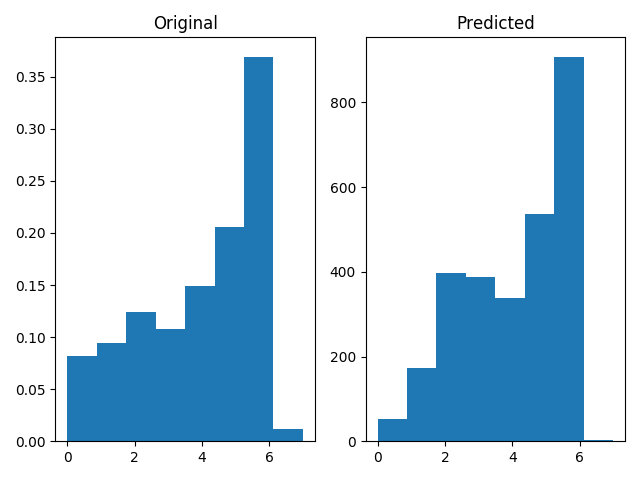

In [7]:
    import matplotlib.pyplot as plt
    
    %matplotlib notebook
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax0, ax1 = axes.flatten()
    ax0.hist(y_test, 8, density=True, histtype='bar')
    ax0.set_title('Original')

    ax1.hist(y_pred, 8)
    ax1.set_title('Predicted')

    fig.tight_layout()